#**Dados**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

#data = pd.read_csv('/content/drive/MyDrive/arquivo/Iris data - Iris.csv')
data = pd.read_csv('/content/drive/MyDrive/arquivo/Iris data - Iris.csv', nrows=100) #Ler apenas as duas primeiras classes

In [ ]:
print(data)

   Sepal length Sepal width Petal length Petal width     Species
0           5,1         3,5          1,4         0,2      setosa
1           4,9           3          1,4         0,2      setosa
2           4,7         3,2          1,3         0,2      setosa
3           4,6         3,1          1,5         0,2      setosa
4             5         3,6          1,4         0,2      setosa
..          ...         ...          ...         ...         ...
95          5,7           3          4,2         1,2  versicolor
96          5,7         2,9          4,2         1,3  versicolor
97          6,2         2,9          4,3         1,3  versicolor
98          5,1         2,5            3         1,1  versicolor
99          5,7         2,8          4,1         1,3  versicolor

[100 rows x 5 columns]


In [ ]:
print(data.dtypes)

Sepal length    object
Sepal width     object
Petal length    object
Petal width     object
Species         object
dtype: object


# **Implementação - Kaique**

In [ ]:
data.iloc[:, :4] = data.iloc[:, :4].replace(',', '.', regex=True)

data.iloc[:, :4] = data.iloc[:, :4].astype(float)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = data.iloc[:, :4].values

y = data.iloc[:, 4].values

# Separando dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class manualMinDistanceClassifier:
    def __init__(self):
        self.centroids = {}

    def printCentroids(self):
        print(self.centroids)

    def fit(self, X, y):
        # Calcula os centróides de cada classe
        for class_label in np.unique(y):
            self.centroids[class_label] = np.mean(X[y == class_label], axis=0)

    def multiplyArrays(self, matrizA, matrizB): #Multiplicação de matriz 1x4 por 4x1 é o mesmo que multiplicar arrays dessa forma
        acc = 0
        for i in range(len(matrizA)):
            acc += matrizA[i] * matrizB[i]
        return acc

    def calculateD(self, vetor, vetorMedia):
        distance = self.multiplyArrays(vetor, vetorMedia) - (self.multiplyArrays(vetorMedia, vetorMedia)/2)
        return distance

    def calculateDifference(self, vetor1, vetorMedia1, vetorMedia2):
        diferenca = self.calculateD(vetor1, vetorMedia1) - self.calculateD(vetor1, vetorMedia2)
        return diferenca

    def decision(self, vetor1):
        vetorMedia1 = self.centroids['setosa']
        vetorMedia2 = self.centroids['versicolor']
        diferenca = self.calculateDifference(vetor1, vetorMedia1, vetorMedia2)
        if diferenca > 0:
            return 'setosa'
        else:
            return 'versicolor'

    def predict(self, X):
        predictions = []
        for sample in X:
            predictions.append(self.decision(sample))
        return np.array(predictions)

# Exemplo de treino
manualClassifier = manualMinDistanceClassifier()
manualClassifier.fit(X_train, y_train)

# Aplicar o classificador ao conjunto de testes
y_pred = manualClassifier.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de testes: {accuracy:.2f}")
print("Classes previstas:", y_pred)
print("Classes verdadeiras:", y_test)

# Exemplo de uso para classificar um novo ponto
#print(manualClassifier.decision([4.9, 2.4, 3.3, 1]))


Acurácia no conjunto de testes: 1.00
Classes previstas: ['versicolor' 'versicolor' 'versicolor' 'setosa' 'setosa' 'setosa'
 'setosa' 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'setosa' 'versicolor']
Classes verdadeiras: ['versicolor' 'versicolor' 'versicolor' 'setosa' 'setosa' 'setosa'
 'setosa' 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'versicolor' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'setosa' 'versicolor']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.iloc[:, :4].values

y = data.iloc[:, 4].values

# Separando dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class MinDistanceClassifier:
    def __init__(self):
        self.centroids = {}

    def fit(self, X, y):
        for class_label in np.unique(y):
            self.centroids[class_label] = np.mean(X[y == class_label], axis=0)

    def predict(self, X):
        y_pred = []
        for sample in X:
            distances = {label: np.linalg.norm(sample - centroid) for label, centroid in self.centroids.items()}
            closest_class = min(distances, key=distances.get)
            y_pred.append(closest_class)
        return np.array(y_pred)

classifier = MinDistanceClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Analisando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do classificador:", accuracy)
print("Classes previstas:", y_pred)
print("Classes verdadeiras:", y_test)




Acurácia do classificador: 1.0
Classes previstas: ['versicolor' 'versicolor' 'versicolor' 'setosa' 'setosa' 'setosa'
 'setosa' 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'setosa']
Classes verdadeiras: ['versicolor' 'versicolor' 'versicolor' 'setosa' 'setosa' 'setosa'
 'setosa' 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'setosa']


 **Implementação Manual**

In [ ]:
novos_valores = np.array([[5.6, 0.5, 3.4, 0.2]])

classe_predita = classifier.predict(novos_valores)

print("Classe predita para os novos valores:", classe_predita)


Classe predita para os novos valores: ['versicolor']


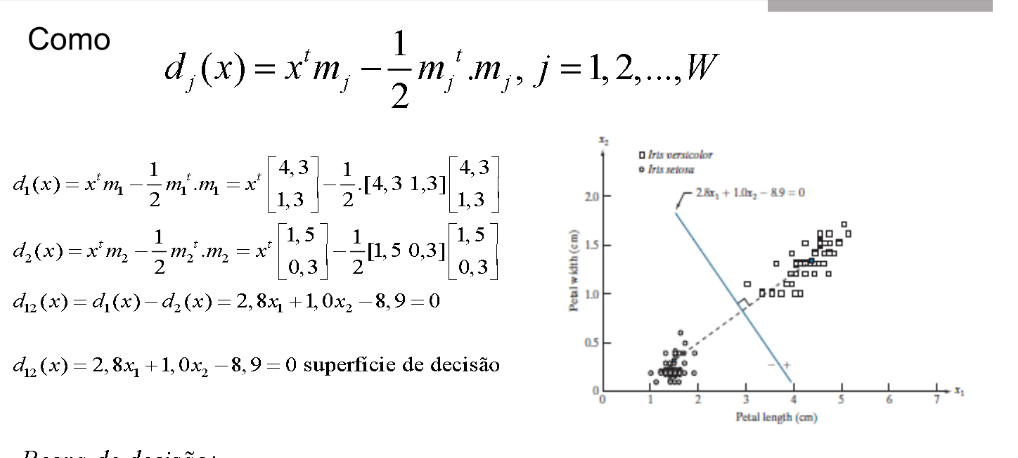


 **Implementação Manual variação**

In [ ]:
import numpy as np

X = data.iloc[:, :4].values  # Colunas de 0 a 3
y = data.iloc[:, 4].values   # Coluna 4

def train_test_split_np(X, y, test_size=0.3, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.random.permutation(len(X))  # Embaralhar os índices
    test_size = int(len(X) * test_size)  # Determinar tamanho do teste
    test_indices = indices[:test_size]   # Índices de teste
    train_indices = indices[test_size:]  # Índices de treino
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split_np(X, y, test_size=0.3, random_state=42)

class MinDistanceClassifier:
    def __init__(self):
        self.centroids = {}

    def fit(self, X, y):
        for class_label in np.unique(y):
            self.centroids[class_label] = np.mean(X[y == class_label], axis=0)

    def predict(self, X):
        y_pred = []
        for sample in X:
            distances = {label: np.linalg.norm(sample - centroid) for label, centroid in self.centroids.items()}
            closest_class = min(distances, key=distances.get)
            y_pred.append(closest_class)
        return np.array(y_pred)

# Criando o classificador e treinando
classifier = MinDistanceClassifier()
classifier.fit(X_train, y_train)

# Fazendo predições
y_pred = classifier.predict(X_test)

# Calculando a acurácia
accuracy = np.mean(y_pred == y_test)
print("Acurácia do classificador:", accuracy)
print("Classes previstas:", y_pred)
print("Classes verdadeiras:", y_test)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

testando o classificador manual 2

In [ ]:

new_sample = np.array([5.1, 3.5, 1.4, 0.2])

predicted_class = classifier.predict(new_sample.reshape(1, -1))
4
print("A classe prevista para o novo exemplo é:", predicted_class[0])

A classe prevista para o novo exemplo é: setosa


# **Classificador**

In [ ]:
import numpy as np

X = data.iloc[:, :4].values  # Colunas de 0 a 3
y = data.iloc[:, 4].values   # Coluna 4

def train_test_split_np(X, y, test_size=0.3, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.random.permutation(len(X))  # Embaralhar os índices (para amenizar o bias)
    test_size = int(len(X) * test_size)  # Determinar tamanho do teste
    test_indices = indices[:test_size]   # Índices de teste
    train_indices = indices[test_size:]  # Índices de treino
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split_np(X, y, test_size=0.3, random_state=42)


def euclidean_distance(point1, point2):
    """Calcula a distância euclidiana entre dois pontos."""
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i])**2
    return distance**0.5

class MinDistanceClassifier:
    def __init__(self):
        self.centroids = {}


    def fit(self, X, y):
        for class_label in set(y):
            points_in_class = [X[i] for i in range(len(X)) if y[i] == class_label]
            centroid = [sum(feature) / len(points_in_class) for feature in zip(*points_in_class)]
            self.centroids[class_label] = centroid

    def predict(self, X):
        y_pred = []
        for sample in X:
            distances = {label: euclidean_distance(sample, centroid) for label, centroid in self.centroids.items()}
            closest_class = min(distances, key=distances.get)
            y_pred.append(closest_class)

        print(self.centroids)
        return y_pred


classifier = MinDistanceClassifier()
classifier.fit(X_train, y_train)

# Fazendo predições
y_pred = classifier.predict(X_test)

# Calculando a acurácia
accuracy = np.mean(y_pred == y_test)
print("Acurácia do classificador:", accuracy)
print("Classes previstas:", y_pred)
print("Classes verdadeiras:", y_test)

{'setosa': [4.964516129032259, 3.3774193548387097, 1.464516129032258, 0.2483870967741936], 'versicolor': [5.862162162162162, 2.724324324324324, 4.210810810810811, 1.3027027027027025], 'virginica': [6.55945945945946, 2.9864864864864864, 5.545945945945945, 2.005405405405405]}
Acurácia do classificador: 0.9555555555555556
Classes previstas: ['versicolor', 'setosa', 'virginica', 'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica', 'setosa', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'setosa', 'virginica', 'versicolor', 'virginica', 'setosa', 'setosa']
Classes verdadeiras: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 've

### **Testando o classificador**

In [ ]:
new_sample = np.array([5.1, 3.5, 1.4, 0.2])

predicted_class = classifier.predict(new_sample.reshape(1, -1))
4
print("A classe prevista para o novo exemplo é:", predicted_class[0])

A classe prevista para o novo exemplo é: setosa
